# Problem 2: Newsgroups

The code for this multilayer perceptron can be found in `newsgroups.py`. The module `utils.py` contains helper functions to load the dataset, display progress bar, plot graphs, etc.

In [8]:
import sys
sys.path.append('../src/')
from newsgroups_v2 import *

---
## Building the Model

We initialize the parameters of the single-layer MLP.

In [14]:
# Model parameters
batch_size = 64
layers = [61188, 100, 20]
learning_rate = 1e-4
momentum = 0.9
eps = 1e-5
train_filename = "../data/newsgroups/matlab/train"
test_filename = "../data/newsgroups/matlab/test"
saved = "../data/newsgroups/saved/"
train_size = 11269
test_size = 7505

We now load the data into Torch tensors.

In [16]:
lr_search = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
nb_epochs = 20

### No Preprocessing

In [17]:
# Load dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "count")
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [18]:
# Build and train model
train_acc, test_acc = torch.zeros(len(lr_search), nb_epochs), torch.zeros(len(lr_search), nb_epochs) 

for i, lr in enumerate(lr_search):
    print("%s\nLearning rate = %.5f\n%s" % ("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, train, test = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i] = torch.FloatTensor(train)
    test_acc[i] = torch.FloatTensor(test)

Learning rate = 0.10000
------------------------------
Epoch 1/20
Avg loss: 12.9437 -- Train acc: 0.0420 -- Test acc: 0.0421
Epoch 2/20
Avg loss: 10.7540 -- Train acc: 0.0435 -- Test acc: 0.0433
Epoch 3/20
Avg loss: 20.9921 -- Train acc: 0.0441 -- Test acc: 0.0438
Epoch 4/20
Avg loss: 8.2524 -- Train acc: 0.0425 -- Test acc: 0.0421
Epoch 5/20
Avg loss: 8.4540 -- Train acc: 0.0415 -- Test acc: 0.0416
Epoch 6/20
Avg loss: 11.3564 -- Train acc: 0.0410 -- Test acc: 0.0410
Epoch 7/20
Avg loss: 10.0223 -- Train acc: 0.0429 -- Test acc: 0.0432
Epoch 8/20
Avg loss: 4.5492 -- Train acc: 0.0438 -- Test acc: 0.0441
Epoch 9/20
Avg loss: 4.5823 -- Train acc: 0.0433 -- Test acc: 0.0444
Epoch 10/20
Avg loss: 4.5794 -- Train acc: 0.0433 -- Test acc: 0.0429
Epoch 11/20
Avg loss: 4.5442 -- Train acc: 0.0433 -- Test acc: 0.0428
Epoch 12/20
Avg loss: 4.5436 -- Train acc: 0.0433 -- Test acc: 0.0428
Epoch 13/20
Avg loss: 4.5435 -- Train acc: 0.0433 -- Test acc: 0.0428
Epoch 14/20
Avg loss: 4.5433 -- Train a

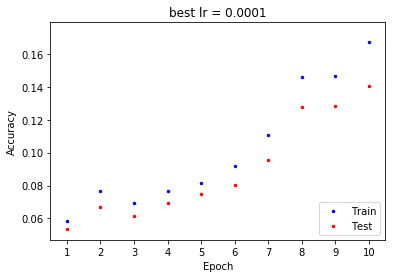

In [32]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], ["Train", "Test"], "Accuracy", "best lr = {}".format(best_lr))

### TF-IDF

In [4]:
# Load dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "tfidf")
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [33]:
# Build and train model
train_acc, test_acc = torch.zeros(len(lr_search), nb_epochs), torch.zeros(len(lr_search), nb_epochs) 

for i, lr in enumerate(lr_search):
    print("%s\nLearning rate = %.5f\n%s" % ("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, train, test = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i] = torch.FloatTensor(train)
    test_acc[i] = torch.FloatTensor(test)

Learning rate = 0.10000
------------------------------
Epoch 1/10
Avg loss: 12.2553 -- Train acc: 0.0420 -- Test acc: 0.0432
Epoch 2/10
Avg loss: 14.7035 -- Train acc: 0.0427 -- Test acc: 0.0429
Epoch 3/10
Avg loss: 17.1478 -- Train acc: 0.0433 -- Test acc: 0.0440
Epoch 4/10
Avg loss: 17.4266 -- Train acc: 0.0430 -- Test acc: 0.0432
Epoch 5/10
Avg loss: 18.2547 -- Train acc: 0.0438 -- Test acc: 0.0432
Epoch 6/10
Avg loss: 4.5566 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 7/10
Avg loss: 4.5410 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 8/10
Avg loss: 5.4732 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 9/10
Avg loss: 4.5493 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 10/10
Avg loss: 4.5434 -- Train acc: 0.0437 -- Test acc: 0.0432
Training done! Elapsed time: 0:00:22

Learning rate = 0.01000
------------------------------
Epoch 1/10
Avg loss: 3.5126 -- Train acc: 0.0559 -- Test acc: 0.0561
Epoch 2/10
Avg loss: 3.3018 -- Train acc: 0.0561 -- Test acc: 0.0553
Epoch 3/10
Avg los

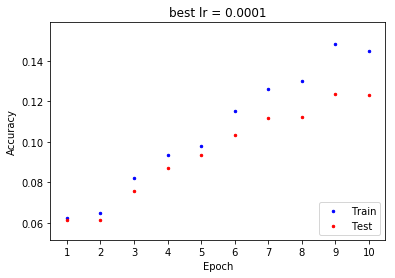

In [35]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], ["Train", "Test"], "Accuracy", "best lr = {}".format(best_lr))

### Standardization

In [3]:
# Load dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "stand", eps)
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [28]:
# Build and train model
train_acc, test_acc = torch.zeros(len(lr_search), nb_epochs), torch.zeros(len(lr_search), nb_epochs) 

for i, lr in enumerate(lr_search):
    print("%s\nLearning rate = %.5f\n%s" % ("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, train, test = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i] = torch.FloatTensor(train)
    test_acc[i] = torch.FloatTensor(test)

Learning rate = 0.10000
------------------------------
Epoch 1/3
Avg loss: 10.8232 -- Train acc: 0.0410 -- Test acc: 0.0413
Epoch 2/3
Avg loss: 7.8368 -- Train acc: 0.0425 -- Test acc: 0.0430
Epoch 3/3
Avg loss: 10.3764 -- Train acc: 0.0452 -- Test acc: 0.0438
Training done! Elapsed time: 0:00:06

Learning rate = 0.01000
------------------------------
Epoch 1/3
Avg loss: 3.4557 -- Train acc: 0.0557 -- Test acc: 0.0552
Epoch 2/3
Avg loss: 3.4261 -- Train acc: 0.0558 -- Test acc: 0.0556
Epoch 3/3
Avg loss: 3.3812 -- Train acc: 0.0581 -- Test acc: 0.0514
Training done! Elapsed time: 0:00:06



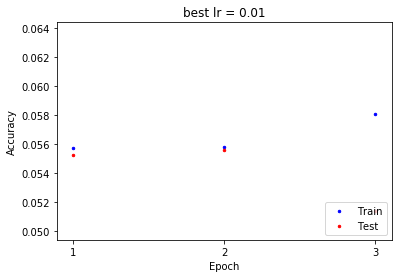

In [29]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], ["Train", "Test"], "Accuracy", "best lr = {}".format(best_lr))

---
## Variance in training

In [3]:
# Load tfidf dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "tfidf")
learning_rate = 0.2

In [4]:
batch_size = 1
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [9]:
mlp_t = Newsgroups(layers, learning_rate, momentum)
train_loss, train_acc, test_acc = mlp_t.train(5000, train_loader, test_loader, by_epoch=False)

NameError: name 'nb_epochs' is not defined

In [ ]:
batch_size = 100
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)